In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn import metrics
import itertools

In [2]:
df = pd.read_csv('F:\\fakenews\Resources\\train.csv')
# X = df.iloc[:, :-1].values
# y = df.iloc[:, -1].values


In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
df.shape

(20800, 5)

In [5]:
df = df.dropna()

In [6]:
final_df = df.copy();

In [7]:
final_df.reset_index(inplace=True)

In [8]:
ps = PorterStemmer()
corpus = []
for i in range(0,final_df.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', final_df['title'][i])
    review = review.lower()
    review = review.split()
    review = [ ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [9]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [10]:
## Appling count vectoriser

cv = CountVectorizer(max_features = 8000, ngram_range =(1,3))
X = cv.fit_transform(corpus).toarray()



In [11]:
y=final_df['label']
print(y)

0        1
1        0
2        1
3        1
4        1
        ..
18280    0
18281    0
18282    0
18283    1
18284    1
Name: label, Length: 18285, dtype: int64


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [13]:
count_df = pd.DataFrame(X_train, columns = cv.get_feature_names())

In [14]:
count_df.head()

,aaron,ab,abandon,abba,abc,abc news,abduct,abe,abedin,abl,...,zika new,zika new york,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


 <h1>Multinomial NB

In [16]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha = 0.30000000000000004)

accuracy:   0.906
Confusion matrix, without normalization


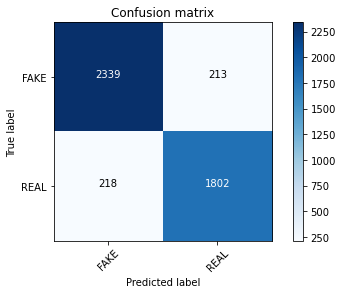

In [17]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])


<h1> Passive Aggressive Classifier

In [18]:
from sklearn.linear_model import  PassiveAggressiveClassifier
classifier_1 = PassiveAggressiveClassifier()

accuracy:   0.925
Confusion matrix, without normalization


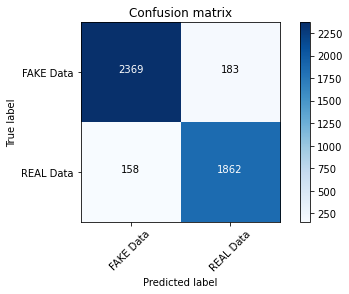

In [19]:
classifier_1.fit(X_train,y_train)
pred = classifier_1.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])


<h1> Multinomial Classifier with Hyperparameter

In [20]:
classifier = MultinomialNB(alpha=0.1)

In [21]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Users\Anurag\anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha: 0.0, Score : 0.8851706036745407
Alpha: 0.1, Score : 0.9044181977252843
Alpha: 0.2, Score : 0.9052930883639545
Alpha: 0.30000000000000004, Score : 0.9057305336832896
Alpha: 0.4, Score : 0.9059492563429571
Alpha: 0.5, Score : 0.9057305336832896
Alpha: 0.6000000000000001, Score : 0.9061679790026247
Alpha: 0.7000000000000001, Score : 0.905511811023622
Alpha: 0.8, Score : 0.905074365704287
Alpha: 0.9, Score : 0.9044181977252843


In [22]:
## Get Features names
feature_names = cv.get_feature_names()


In [ ]:
classifier.coef_[0]

In [23]:
# Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

C:\Users\Anurag\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


[(-4.098638040215473, 'trump'),
 (-4.385633361515256, 'hillari'),
 (-4.497131089274706, 'clinton'),
 (-4.9957516474498895, 'elect'),
 (-5.349504554510744, 'new'),
 (-5.357112046506356, 'video'),
 (-5.470181124429889, 'comment'),
 (-5.509418939054752, 'us'),
 (-5.531901900459307, 'war'),
 (-5.531901900459307, 'fbi'),
 (-5.536459793491205, 'hillari clinton'),
 (-5.588017603156055, 'email'),
 (-5.657732235771416, 'vote'),
 (-5.678577180201782, 'obama'),
 (-5.705259659626943, 'world'),
 (-5.844291744021684, 'donald'),
 (-5.895290685085006, 'donald trump'),
 (-5.908457432246219, 'russia'),
 (-5.908457432246219, 'america'),
 (-5.991320548259724, 'presid')]

In [25]:
### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:5000];